In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size = 12

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.in_dim = 28 * 28  # MNIST 이미지 크기
        self.out_dim = 10      # 클래스 수

        self.linears = nn.ModuleList([
            nn.Linear(self.in_dim, 512),
            nn.Linear(512, 256),
            nn.Linear(256, 128),
            nn.Linear(128, 64),
            nn.Linear(64, self.out_dim)
        ])

        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, self.in_dim)
        for layer in self.linears[:-1]:
            x = self.relu(layer(x))
        x = self.linears[-1](x)    # 출력층
        return x


In [ ]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):  # 10 에폭 반복
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.156
[1,  4000] loss: 0.704
[2,  2000] loss: 0.313
[2,  4000] loss: 0.237
[3,  2000] loss: 0.160
[3,  4000] loss: 0.141
[4,  2000] loss: 0.109
[4,  4000] loss: 0.101
[5,  2000] loss: 0.081
[5,  4000] loss: 0.078
[6,  2000] loss: 0.063
[6,  4000] loss: 0.060
[7,  2000] loss: 0.044
[7,  4000] loss: 0.051
[8,  2000] loss: 0.036
[8,  4000] loss: 0.038
[9,  2000] loss: 0.030
[9,  4000] loss: 0.033
[10,  2000] loss: 0.022
[10,  4000] loss: 0.023
Finished Training


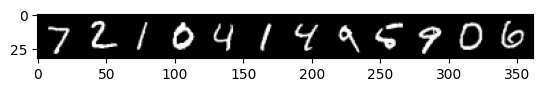

GroundTruth:   7   2   1   0   4   1   4   9   5   9   0   6
Prediction:   7   2   1   0   4   1   4   9   5   9   0   6


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth:', ' '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Prediction:', ' '.join('%3s' % label.item() for label in predicted))


In [ ]:
n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    n_predict += len(predicted)
    n_correct += (labels == predicted).sum().item()

print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")


9772/10000
Accuracy: 0.977
